In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
from matplotlib.patches import ConnectionPatch

TESTERROR
--------------

In [ ]:
def error_with_inset(log_path, save_path, models_title, x_lim, y_lim, inset_y_lim, inset_y_ticks, inset_x_lim, inset_x_ticks, dataset_name):
    # Load the data
    smsam_csv = pd.read_csv(log_path[0], header=1)
    asam_csv = pd.read_csv(log_path[1], header=1)
    sam_csv = pd.read_csv(log_path[2], header=1)
    colors = ['#005fbf','#00ad53','#bf0000']
    # Combine the data into a single DataFrame
    combined_data = pd.DataFrame({
        'Epoch': smsam_csv['Epoch'][x_lim[0]:x_lim[1]],
        'CSAM': 100 - smsam_csv['Test_Accuracy'][x_lim[0]:x_lim[1]],
        'ASAM': 100 - asam_csv['Test_Accuracy'][x_lim[0]:x_lim[1]],
        'SAM': 100 - sam_csv['Test_Accuracy'][x_lim[0]:x_lim[1]]
    })

    # Set up the plotting style
    sns.set(style="whitegrid")
    sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})

    # Create the main plot
    fig, ax = plt.subplots(figsize=(8,6), dpi=200)
    sns.lineplot(data=combined_data, x='Epoch', y='CSAM', label='CSAM', linestyle='-', ax=ax, color=colors[2])
    sns.lineplot(data=combined_data, x='Epoch', y='ASAM', label='ASAM', linestyle='-', ax=ax, color=colors[1])
    sns.lineplot(data=combined_data, x='Epoch', y='SAM', label='SAM', linestyle='-', ax=ax, color=colors[0])

    # Customize the plot
    ax.set_ylim(y_lim[0], y_lim[1])
    ax.set_xlabel('Epoch', labelpad=5)
    ax.set_ylabel('Error Rate (%)', labelpad=5)
    ax.grid(True)
    ax.set_title(models_title + ' on ' + dataset_name, pad=5, fontsize=12)
    ax.legend(loc='upper right')
    ax.tick_params(
        direction='out',       # Draw ticks inward
        length=6,             # Length of the tick lines
        width=1.5,            # Width of the tick lines
        labelsize=12          # Adjust tick label font size
    )
    # Add an inset (zoomed-in view)
        # Customize the tick marks for the inset
    ax_inset = inset_axes(ax, width="35%", height="35%", loc='upper center', borderpad=2)  # Adjust size and position
    ax_inset.set_xlim(inset_x_lim[0], inset_x_lim[1])  # Set zoom range for x-axis
    ax_inset.set_ylim(inset_y_lim[0], inset_y_lim[1])  # Set zoom range for y-axis

    # Plot the same data in the inset
    sns.lineplot(data=combined_data, x='Epoch', y='CSAM', label='CSAM', linestyle='-', ax=ax_inset,color=colors[2])
    sns.lineplot(data=combined_data, x='Epoch', y='ASAM', label='ASAM', linestyle='-', ax=ax_inset,color=colors[1])
    sns.lineplot(data=combined_data, x='Epoch', y='SAM', label='SAM', linestyle='-', ax=ax_inset,color=colors[0])

    # Remove legend in the inset to avoid clutter
    ax_inset.get_legend().remove()
    ax_inset.set_xticks(inset_x_ticks)
    ax_inset.set_yticks(inset_y_ticks)
    ax_inset.grid(False)
    ax_inset.set_xlabel("")
    ax_inset.set_ylabel("")    
    ax_inset.tick_params(
        direction='in',       # Draw ticks inward
        length=6,             # Length of the tick lines
        width=1.5,            # Width of the tick lines
        labelsize=8          # Adjust tick label font size
    )
    
    zoom_xlim = (inset_x_lim[0], inset_x_lim[1])  # 放大区域的 x 范围
    zoom_ylim = (inset_y_lim[0]-0.2, inset_y_lim[1]+0.2)  # 放大区域的 y 范围

    # 绘制放大区域矩形框
    rect_color = "lightgray"
    rect_linewidth = 0.7
    ax.plot(
        [zoom_xlim[0], zoom_xlim[1], zoom_xlim[1], zoom_xlim[0], zoom_xlim[0]],
        [zoom_ylim[0], zoom_ylim[0], zoom_ylim[1], zoom_ylim[1], zoom_ylim[0]],
        color=rect_color,
        linestyle="-",
        linewidth=rect_linewidth
    )
    
    # 添加连接线
    # 获取主图和嵌套图的坐标系
    xy_main_1 = (zoom_xlim[0], zoom_ylim[0])
    xy_main_2 = (zoom_xlim[1], zoom_ylim[1])
    xy_inset_1 = (0, 0)  # 嵌套图左下角
    xy_inset_2 = (1, 1)  # 嵌套图右上角
    
    con1 = ConnectionPatch(
        xyA=xy_main_1, coordsA=ax.transData,
        xyB=xy_inset_1, coordsB=ax_inset.transAxes,
        color=rect_color, linewidth=rect_linewidth
    )
    con2 = ConnectionPatch(
        xyA=xy_main_2, coordsA=ax.transData,
        xyB=xy_inset_2, coordsB=ax_inset.transAxes,
        color=rect_color, linewidth=rect_linewidth
    )
    
    fig.add_artist(con1)
    fig.add_artist(con2)

    # Save the figure
    plt.savefig(save_path[0], dpi=200)
    plt.show()


In [ ]:
data='CIFAR-100'
datapath='cifar100'

model=['PyramidNet110','ResNet56','ResNet20','WRN286','WRN586','DenseNet100'] #'densenet100','resnet20',
models_title=['PyramidNet-110','ResNet-56','ResNet-20','WideResNet-28-6','WideResNet-58-6','DenseNet-100']
x_lim=[0,300]
y_lim=[[15,90],[20,99],[25,95],[15,95],[15,95],[40,99]]
inset_y_ticks = [[17,18.5,20],[23,24,25],[28,29,30],[16,17,18,19],[16,17,18,19],[42,45,48]]
inset_y_lim=[[17, 20], [23, 25], [28, 30], [16, 19], [16, 19], [42, 48]]
inset_x_lim=[280,300]
inset_x_ticks=[280,290,300]
for idx in range(len(model)):
    m = model[idx].lower()
    log_path=['./logs_available/'+datapath+'/'+m+'/test/csam_identity0.1.csv',
              './logs_available/'+datapath+'/'+m+'/test/asam1.0.csv',
              './logs_available/'+datapath+'/'+m+'/test/sam0.1.csv']
    save_path=['./images/'+datapath+'/test_error_'+m+'_inset.png']
    error_with_inset(log_path,
                     save_path,
                     models_title[idx],
                     x_lim,
                     y_lim[idx],
                     inset_y_lim[idx],
                     inset_y_ticks[idx],
                     inset_x_lim,
                     inset_x_ticks,
                     dataset_name=data)

In [ ]:
data='CIFAR-10'
datapath='cifar10'
model=['PyramidNet110','ResNet56','ResNet20','WRN286','WRN586','DenseNet100'] #'densenet100','resnet20',
models_title=['PyramidNet-110','ResNet-56','ResNet-20','WideResNet-28-6','WideResNet-58-6','DenseNet-100']
x_lim = [0, 300]
y_lim=[[0,60],[0,90],[0,70],[0,60],[0,60],[10,70]]
inset_y_lim=[[3, 4], [4.6, 5.2], [5.5, 7.5], [2.5, 4], [2.5, 3.5], [11, 14]]
inset_y_ticks = [[3.0,3.5,4.0],[4.6,4.9,5.2],[5.5,6.5,7.5],[2.5,3.25,4.0],[2.5,3.0,3.5],[11,13,14]]
inset_x_lim = [280,300]
inset_x_ticks = [280,290,300]
for idx in range(len(model)):
    m = model[idx].lower()
    log_path=['./logs_available/'+datapath+'/'+m+'/test/csam_identity0.1.csv',
              './logs_available/'+datapath+'/'+m+'/test/asam1.0.csv',
              './logs_available/'+datapath+'/'+m+'/test/sam0.1.csv']
    save_path=['./images/'+datapath+'/test_error_'+m+'_inset.png']
    error_with_inset(log_path,
                     save_path,
                     models_title[idx],
                     x_lim,
                     y_lim[idx],
                     inset_y_lim[idx],
                     inset_y_ticks[idx],
                     inset_x_lim,
                     inset_x_ticks,
                     dataset_name=data)

In [ ]:
data='MNIST'
datapath='mnist'

model = ['MLP']
models_title = ['MLP-3']
x_lim = [0, 400]
y_lim = [[1,5]]
inset_x_lim = [380,400]
inset_x_ticks = [380,390,400]
inset_y_lim = [[1.2, 1.5]]
inset_y_ticks = [[1.1,1.35,1.5]]

for idx in range(len(model)):
    m = model[idx].lower()
    log_path=['./logs_available/'+datapath+'/'+m+'/test/csam_identity0.1.csv',
              './logs_available/'+datapath+'/'+m+'/test/asam1.0.csv',
              './logs_available/'+datapath+'/'+m+'/test/sam0.1.csv']
    save_path=['./images/'+datapath+'/test_error_'+m+'_inset.png']
    error_with_inset(log_path,
                     save_path,
                     models_title[idx],
                     x_lim,
                     y_lim[idx],
                     inset_y_lim[idx],
                     inset_y_ticks[idx],
                     inset_x_lim,
                     inset_x_ticks,
                     dataset_name=data)

ERRORRAIDUS
-------

In [14]:
def radius(data,model_name,log_path,save_path,rho,y_lim):
    colors = ['#005fbf','#00ad53','#bf0000']
    sam1_csv = pd.read_csv(log_path+'/sam'+str(rho[0])+'.csv',header=1)
    sam2_csv = pd.read_csv(log_path+'/sam'+str(rho[1])+'.csv',header=1)
    sam3_csv = pd.read_csv(log_path+'/sam'+str(rho[2])+'.csv',header=1)
    sam4_csv = pd.read_csv(log_path+'/sam'+str(rho[3])+'.csv',header=1)
    sam5_csv = pd.read_csv(log_path+'/sam'+str(rho[4])+'.csv',header=1)
    sam1 = sam1_csv['Test_Accuracy'][191:301].max()#.mean()
    sam2 = sam2_csv['Test_Accuracy'][191:301].max()#.mean()
    sam3 = sam3_csv['Test_Accuracy'][191:301].max()#.mean()
    sam4 = sam4_csv['Test_Accuracy'][191:301].max()#.mean()
    sam5 = sam5_csv['Test_Accuracy'][191:301].max()#.mean()
#
    csam1_csv = pd.read_csv(log_path+'/csam_identity'+str(rho[0])+'.csv',header=1)
    csam2_csv = pd.read_csv(log_path+'/csam_identity'+str(rho[1])+'.csv',header=1)
    csam3_csv = pd.read_csv(log_path+'/csam_identity'+str(rho[2])+'.csv',header=1)
    csam4_csv = pd.read_csv(log_path+'/csam_identity'+str(rho[3])+'.csv',header=1)
    csam5_csv = pd.read_csv(log_path+'/csam_identity'+str(rho[4])+'.csv',header=1)
    csam1 = csam1_csv['Test_Accuracy'][191:301].max()#.mean()
    csam2 = csam2_csv['Test_Accuracy'][191:301].max()#.mean()
    csam3 = csam3_csv['Test_Accuracy'][191:301].max()#.mean()
    csam4 = csam4_csv['Test_Accuracy'][191:301].max()#.mean()
    csam5 = csam5_csv['Test_Accuracy'][191:301].max()#.mean()

    sam_df = pd.DataFrame({
        'Rho': [rho[0],rho[1],rho[2],rho[3],rho[4]],
        'Test_Accuracy': [sam1, sam2, sam3, sam4, sam5]
    })
    csam_df = pd.DataFrame({
        'Rho': [rho[0],rho[1],rho[2],rho[3],rho[4]],
        'Test_Accuracy': [csam1, csam2, csam3, csam4, csam5]
    })
    # Set up the plotting style
    sns.set(style="whitegrid")
    sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 1.5})
    # Create the plot
    plt.figure(figsize=(8, 6), dpi=200)
    plt.ylim(y_lim[0], y_lim[1])
    sns.lineplot(data=csam_df, x='Rho', y='Test_Accuracy', label='CSAM', linestyle='-', marker="s", markersize=6, zorder=2,color=colors[2])
    sns.lineplot(data=sam_df, x='Rho', y='Test_Accuracy', label='SAM', linestyle='-', marker="P", markersize=6, zorder=1,color=colors[0])
    plt.tick_params(
        direction='in',       # Draw ticks inward
        length=6,             # Length of the tick lines
        width=1.5,            # Width of the tick lines
        labelsize=12           # Adjust tick label font size
    )
    plt.xlabel('Rho', labelpad=5)
    plt.ylabel('Test Accuracy (%)', labelpad=5)
    # plt.xscale('log')
    plt.title(model_name+' on '+ data, pad=5, fontsize=12)
    plt.legend(loc='lower right')

    # Save and show the plot
    plt.savefig(save_path, dpi=200)
    plt.show()

def radius_sem(data, model_name, log_path, save_path, rho, y_lim):
    colors = ['#005fbf', '#00ad53', '#bf0000']

    # 读取每个 rho 的数据文件
    sam_csv_list = [pd.read_csv(log_path + f'/sam{r}.csv', header=1) for r in rho]
    csam_csv_list = [pd.read_csv(log_path + f'/csam_identity{r}.csv', header=1) for r in rho]

    # 计算 SAM 和 CSAM 的均值和标准误差
    sam_results = []
    csam_results = []
    
    for r, sam_df, csam_df in zip(rho, sam_csv_list, csam_csv_list):
        # SAM 数据
        sam_accuracies = sam_df['Test_Accuracy'][191:301]  # 取 191-300 epoch 的数据
        sam_mean = sam_accuracies.max()#mean()                  # 均值
        sam_sem = sam_accuracies.sem()                    # 标准误差
        sam_results.append((r, sam_mean, sam_sem))

        # CSAM 数据
        csam_accuracies = csam_df['Test_Accuracy'][191:301]  # 取 191-300 epoch 的数据
        csam_mean = csam_accuracies.max()#mean()                   # 均值
        csam_sem = csam_accuracies.sem()                     # 标准误差
        csam_results.append((r, csam_mean, csam_sem))

    # 创建 DataFrame
    sam_df = pd.DataFrame(sam_results, columns=['Rho', 'Mean_Test_Accuracy', 'SEM_Test_Accuracy'])
    csam_df = pd.DataFrame(csam_results, columns=['Rho', 'Mean_Test_Accuracy', 'SEM_Test_Accuracy'])

    # 设置绘图样式
    sns.set(style="whitegrid")
    sns.set_context("paper", font_scale=1.8, rc={"lines.linewidth": 1.5})

    # 绘图
    plt.figure(figsize=(8, 6), dpi=200)
    plt.ylim(y_lim[0], y_lim[1])

    # CSAM 曲线
    plt.errorbar(
        csam_df['Rho'], 
        csam_df['Mean_Test_Accuracy'], 
        yerr=csam_df['SEM_Test_Accuracy'], 
        fmt='s-',                             # 点和线型
        markersize=7,                         # 点大小
        label='CSAM', 
        color=colors[2], 
        capsize=5,                            # 误差条末端横线
        elinewidth=1.5,                       # 误差条线宽
        zorder=2
    )

    # SAM 曲线
    plt.errorbar(
        sam_df['Rho'], 
        sam_df['Mean_Test_Accuracy'], 
        yerr=sam_df['SEM_Test_Accuracy'], 
        fmt='P-',                             # 点和线型
        markersize=7,                         # 点大小
        label='SAM', 
        color=colors[0], 
        capsize=5,                            # 误差条末端横线
        elinewidth=1.5,                       # 误差条线宽
        zorder=1
    )

    # 坐标轴设置
    plt.tick_params(
        direction='in',        # 刻度向内
        length=6,              # 刻度线长度
        width=1.5,             # 刻度线宽度
        labelsize=20           # 刻度标签大小
    )
    plt.xlabel('Rho', labelpad=5)
    plt.ylabel('Test Accuracy (%)', labelpad=5)
    plt.title(model_name + ' on ' + data, pad=5, fontsize=20)
    plt.legend(loc='lower right')

    # 保存并显示图表
    plt.savefig(save_path, dpi=200)
    plt.show()


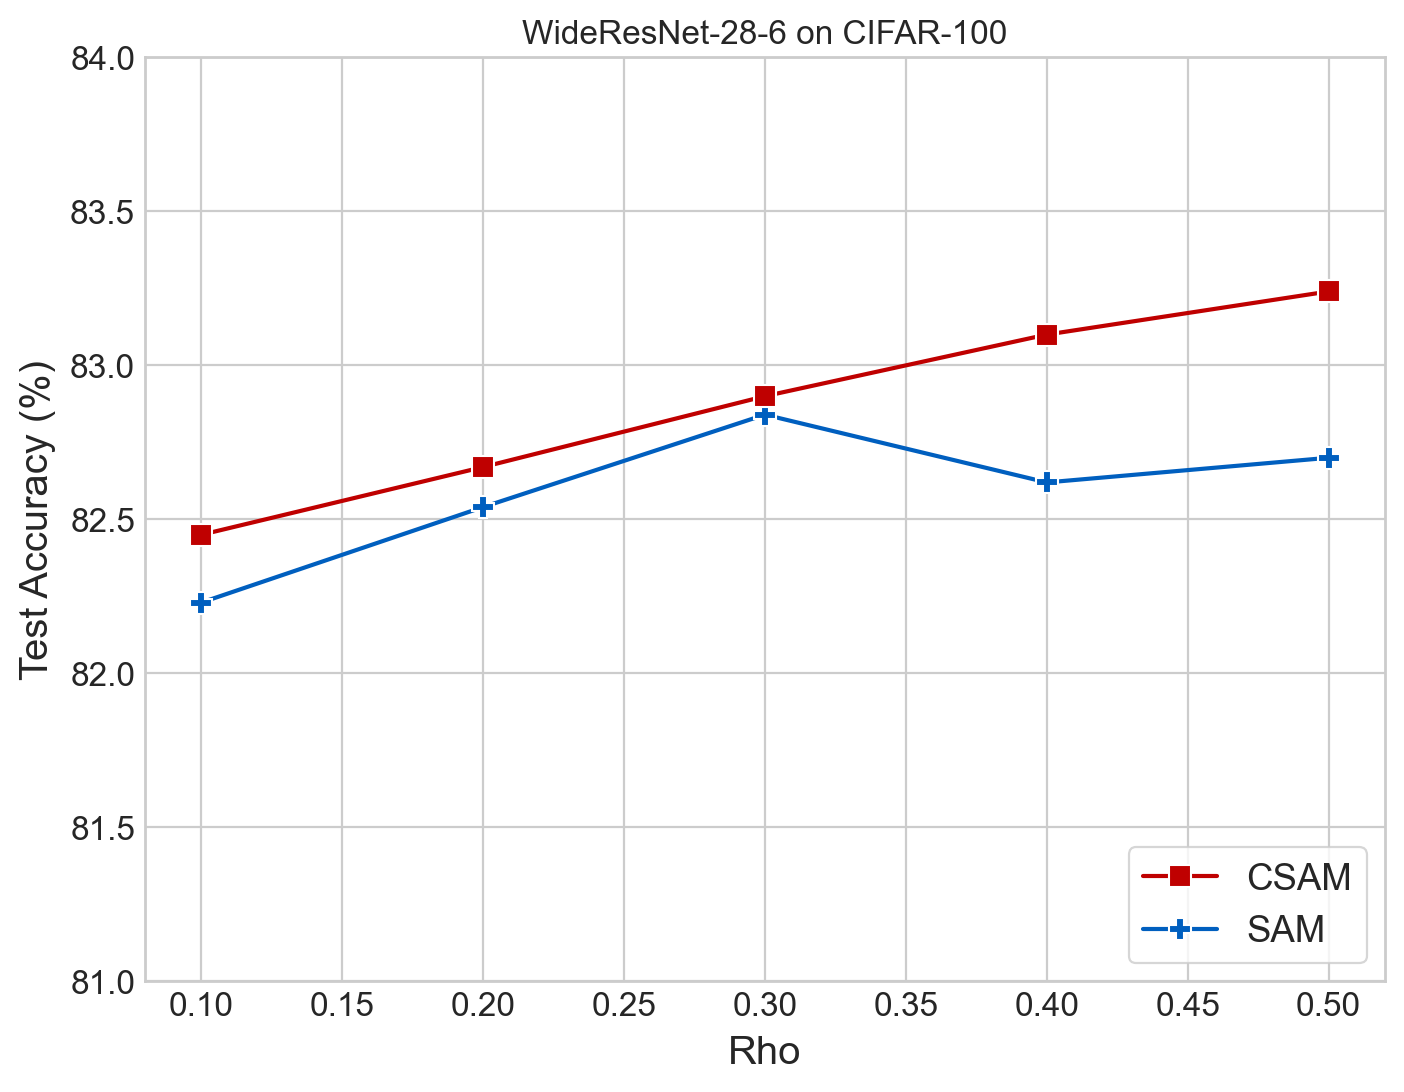

In [13]:
data='CIFAR-100'
datapath=['cifar100']
rho=[0.1,0.2,0.3,0.4,0.5]
y_lim=[81.00,84.00]
model_name='WideResNet-28-6'
modelpath='wrn286' 
log_path='./logs_available/'+datapath[0]+'rho/'+modelpath+'/test'
save_path='./images/'+datapath[0]+'/error_radius_'+modelpath+'.png'

radius(data,model_name,log_path,save_path,rho,y_lim)

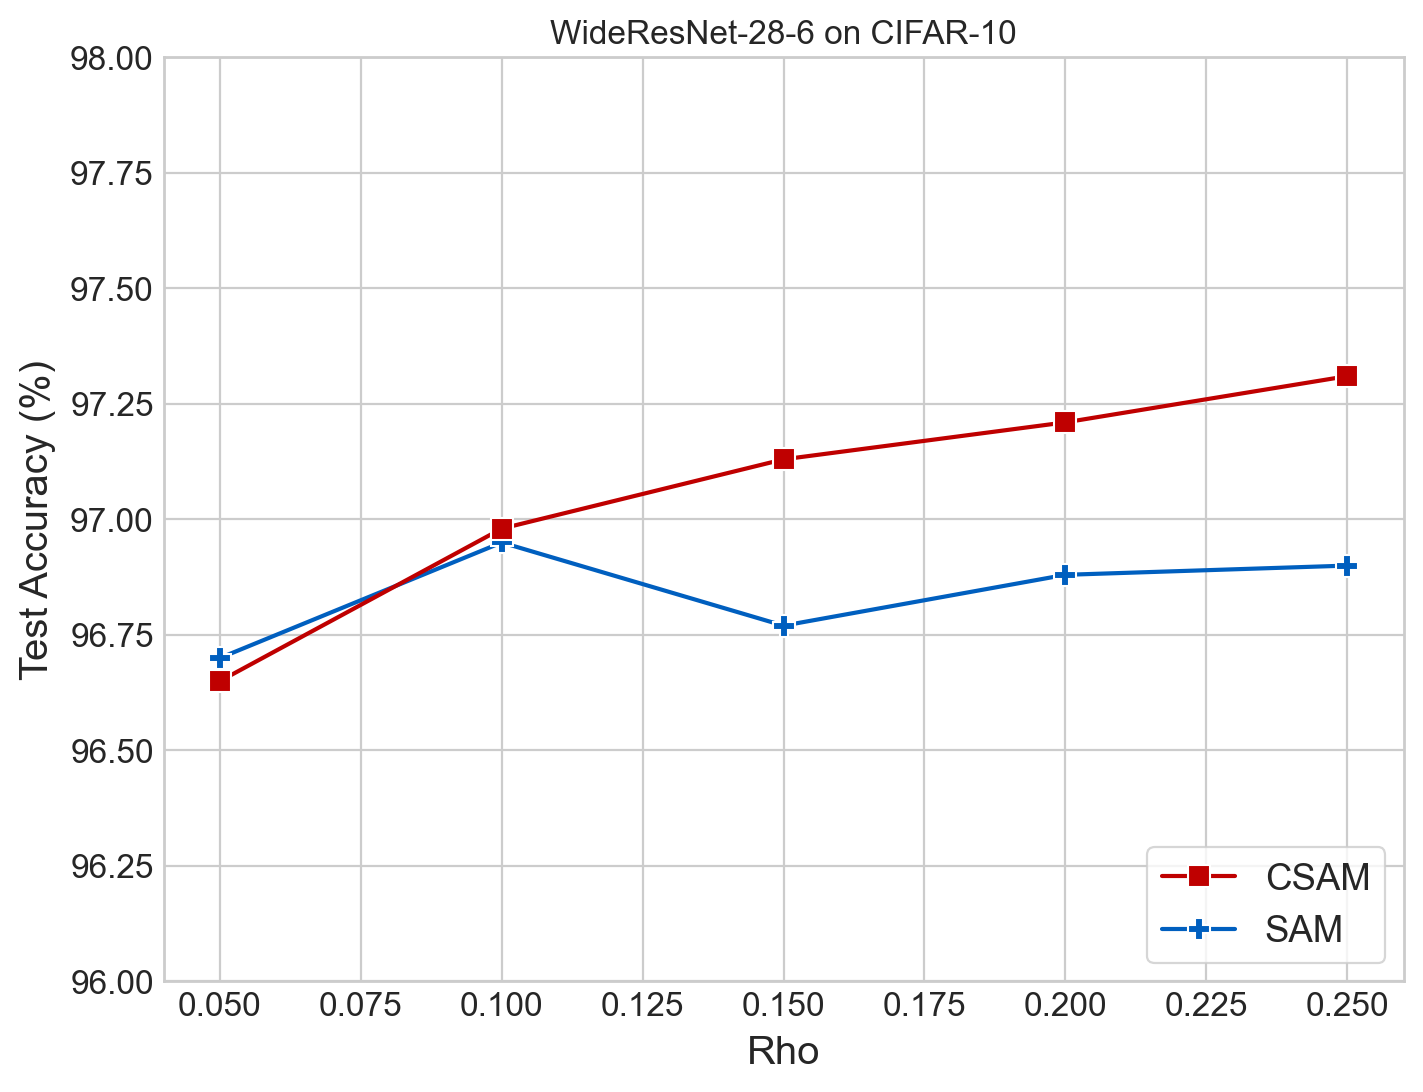

In [14]:
data='CIFAR-10'
datapath=['cifar10']
rho=[0.05,0.1,0.15,0.2,0.25]
y_lim=[96.00,98.00]
model_name='WideResNet-28-6'
modelpath='wrn286'
log_path='./logs_available/'+datapath[0]+'rho/'+modelpath+'/test'
save_path='./images/'+datapath[0]+'/error_radius_'+modelpath+'.png'

radius(data,model_name,log_path,save_path,rho,y_lim)

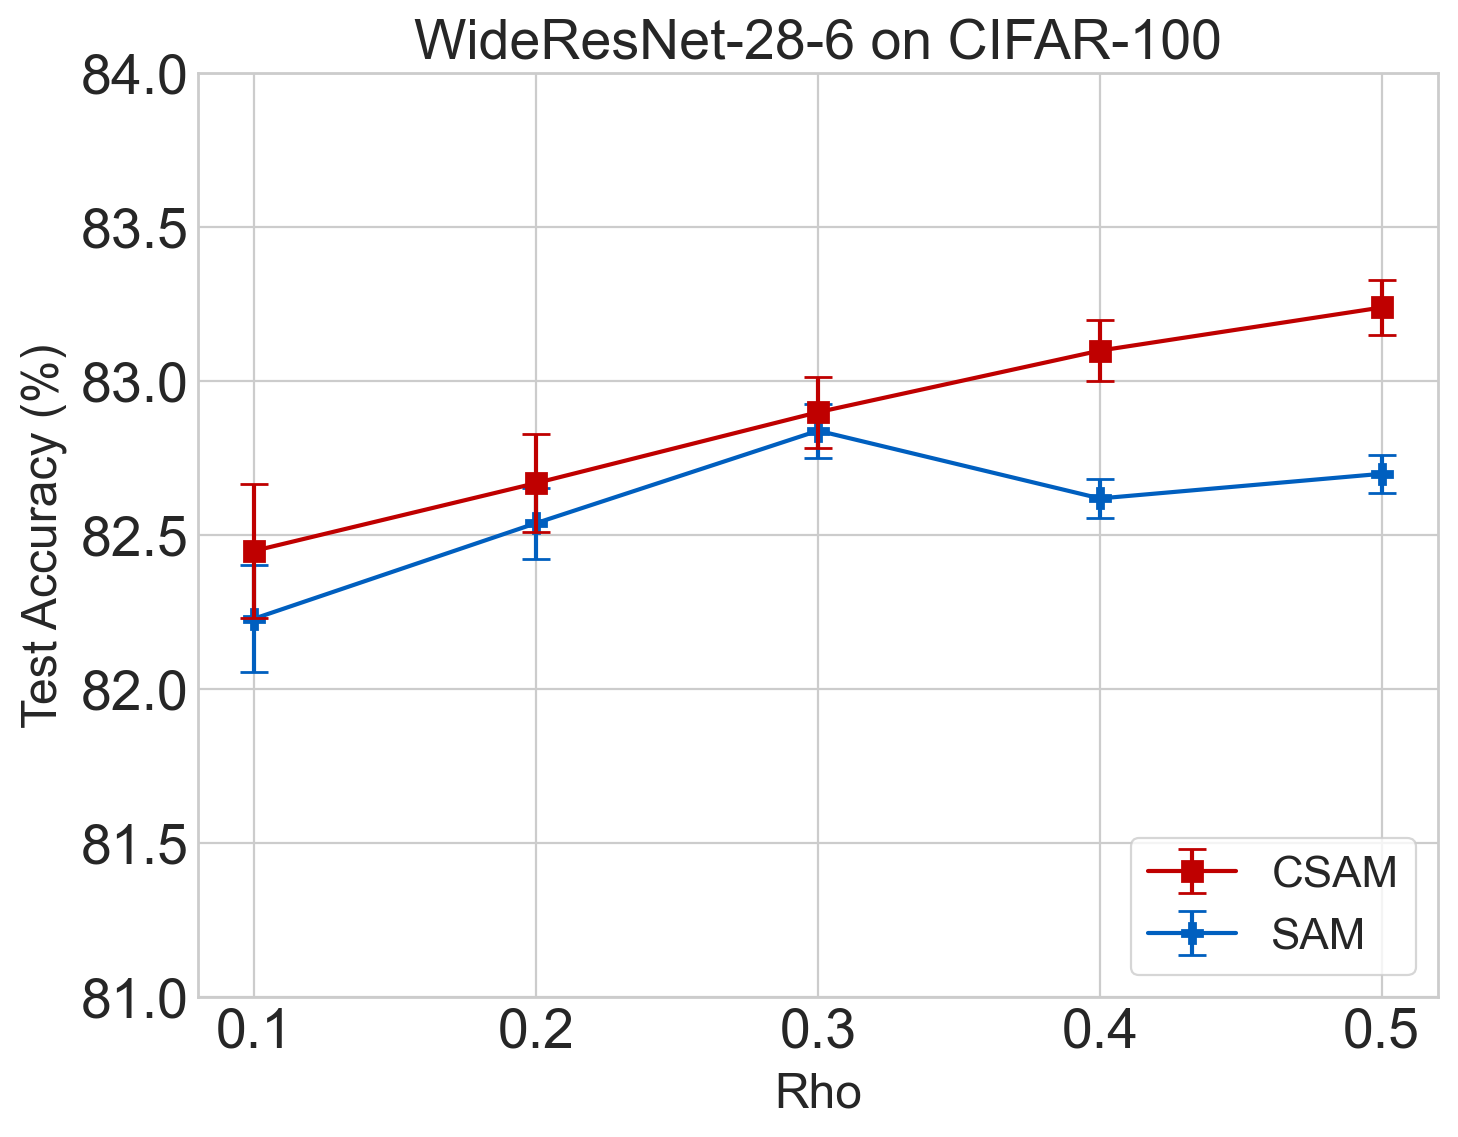

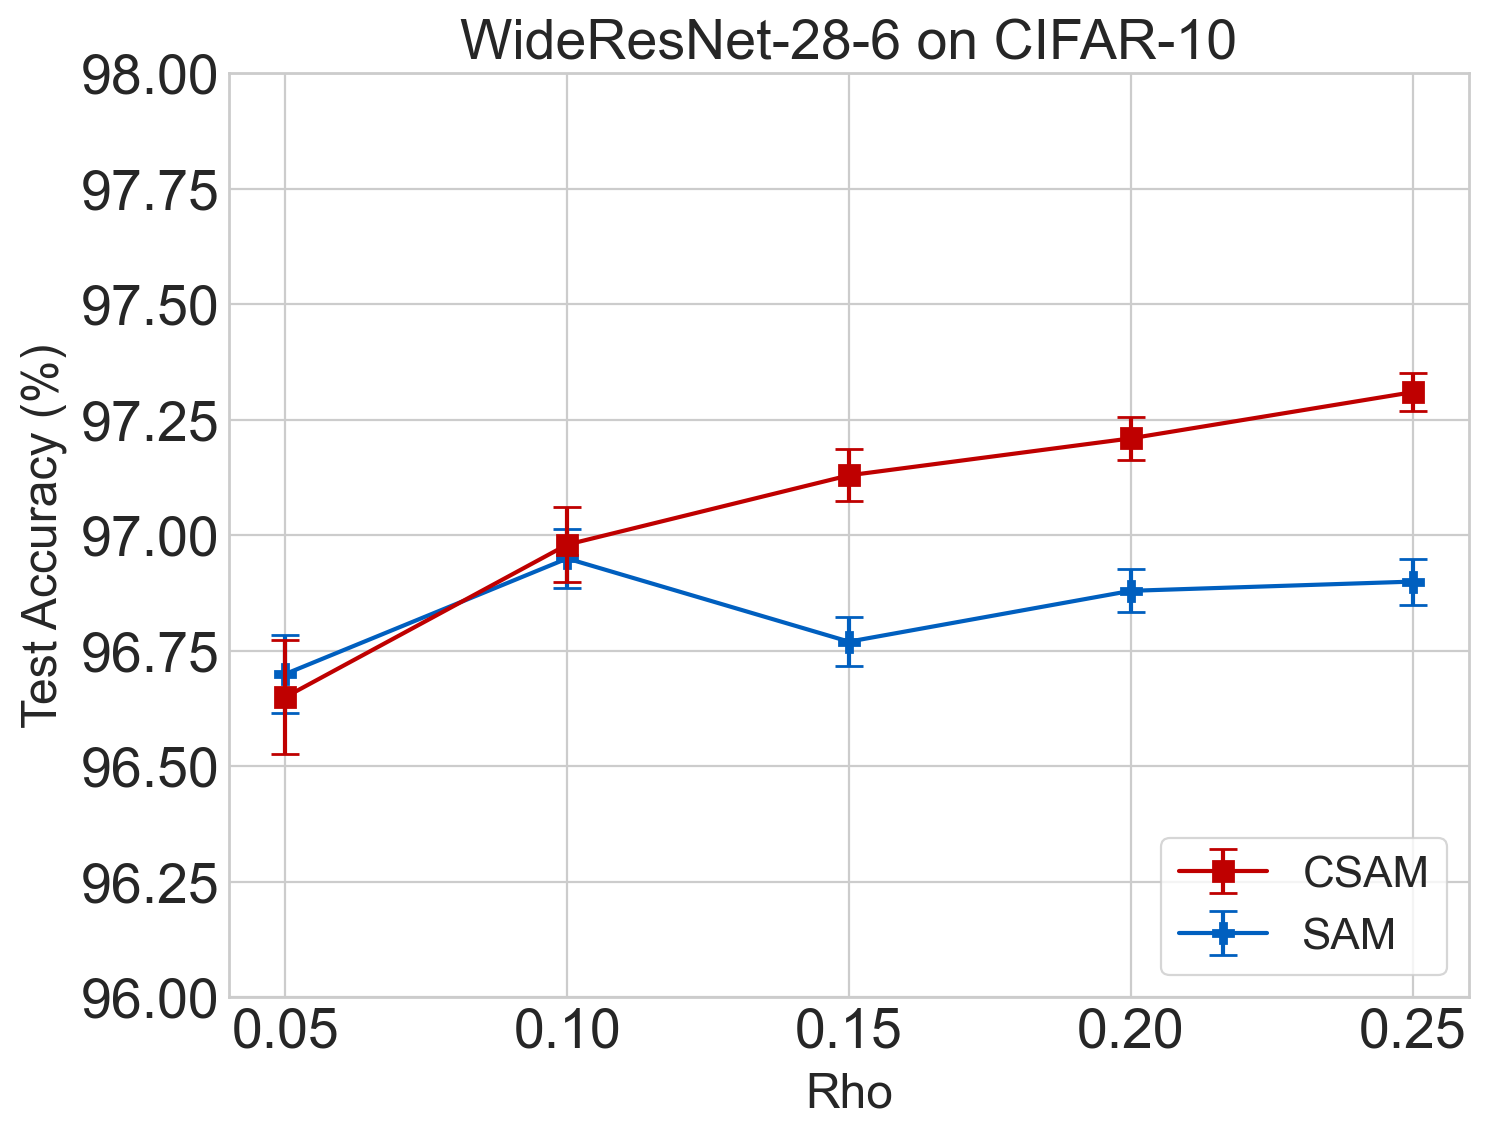

In [15]:
data='CIFAR-100'
datapath=['cifar100']
rho=[0.1,0.2,0.3,0.4,0.5]
y_lim=[81.00,84.00]
model_name='WideResNet-28-6'
modelpath='wrn286' 
log_path='./logs_available/'+datapath[0]+'rho/'+modelpath+'/test'
save_path='./images/'+datapath[0]+'/error_radius_'+modelpath+'.png'

radius_sem(data,model_name,log_path,save_path,rho,y_lim)

data='CIFAR-10'
datapath=['cifar10']
rho=[0.05,0.1,0.15,0.2,0.25]
y_lim=[96.00,98.00]
model_name='WideResNet-28-6'
modelpath='wrn286'
log_path='./logs_available/'+datapath[0]+'rho/'+modelpath+'/test'
save_path='./images/'+datapath[0]+'/error_radius_'+modelpath+'.png'

radius_sem(data,model_name,log_path,save_path,rho,y_lim)